# Prosper Loan Data Exploration and Visualization

## Dataset

The Dataset consists of information regarding various factors and variables in Loans given by Prosper Loans from year 2006 to 2014. Dataset : (https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554486256021000)

It contains 81 variables and 113,979 observation for each loan list data during 2006 to 2014, which can be roughly classified by four kinds of variable categories,i.e,Borrower Data,Loan Data, Credit Risk Metrics, Loan Status.

# Preliminary Wrangling
## Lets collect and explore our data

In [125]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
import glob
import os
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [126]:
path = 'prosperLoanData.csv'
data = pd.read_csv(path)
print('Shape: ',data.shape)
info = data.describe()
data.head()

Shape:  (113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [127]:
data.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [128]:
cols = data.columns
print(data.dtypes)
info.head()

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937.000000,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,627885.692506,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,328076.236386,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,400919.000000,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000


In [129]:
# for c in cols:
#     print(c,' : ',data[c].count())

In [130]:
recom_info = np.unique(data['Recommendations'], return_index=False, return_inverse=False, return_counts=True, axis=None)
recom_info

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 14, 16, 18, 19, 21, 24, 39],
       dtype=int64),
 array([109678,   3516,    568,    108,     26,     14,      4,      5,
             3,      6,      1,      2,      2,      1,      1,      1,
             1], dtype=int64))

In [131]:
data = data.dropna(axis=0, subset=['BorrowerAPR'])

In [132]:
null_info = data.isnull().sum()
drop_cols = []
for i,x in enumerate(null_info):
    if(x>0):
        print(cols[i],': ',x)
    if(x>80000):
        drop_cols.append(cols[i])

CreditGrade :  84984
ClosedDate :  58848
EstimatedEffectiveYield :  29059
EstimatedLoss :  29059
EstimatedReturn :  29059
ProsperRating (numeric) :  29059
ProsperRating (Alpha) :  29059
ProsperScore :  29059
BorrowerState :  5490
Occupation :  3563
EmploymentStatus :  2230
EmploymentStatusDuration :  7600
GroupKey :  100589
CreditScoreRangeLower :  566
CreditScoreRangeUpper :  566
FirstRecordedCreditLine :  672
CurrentCreditLines :  7579
OpenCreditLines :  7579
TotalCreditLinespast7years :  672
InquiriesLast6Months :  672
TotalInquiries :  1134
CurrentDelinquencies :  672
AmountDelinquent :  7597
DelinquenciesLast7Years :  965
PublicRecordsLast10Years :  672
PublicRecordsLast12Months :  7579
RevolvingCreditBalance :  7579
BankcardUtilization :  7579
AvailableBankcardCredit :  7519
TotalTrades :  7519
TradesNeverDelinquent (percentage) :  7519
TradesOpenedLast6Months :  7519
DebtToIncomeRatio :  8554
TotalProsperLoans :  91827
TotalProsperPaymentsBilled :  91827
OnTimeProsperPayments : 

In [133]:
data = data.drop(drop_cols,axis = 1)
data.shape

(113912, 70)

In [134]:
data_info = data.describe()
data_info

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139120e+05,113912.000000,113912.000000,113912.000000,113912.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000
mean,6.280235e+05,40.831308,0.218828,0.192786,0.182723,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.734997,-14.244741,700.600068,681.570049,25.148204,0.998583,0.048037,0.023465,16.554383,80.491792
std,3.279803e+05,10.437112,0.080364,0.074809,0.074506,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.677981,109.244070,2388.753377,2357.404098,275.687933,0.017921,0.332389,0.232437,294.577640,103.244281
min,7.000000e+01,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.012110e+05,36.000000,0.156290,0.134000,0.124500,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.006245e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.450000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.927982e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.930000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [135]:
term_info = np.unique(data['Term'], return_index=False, return_inverse=False, return_counts=True, axis=None)
term_info

(array([12, 36, 60], dtype=int64), array([ 1614, 87753, 24545], dtype=int64))

In [136]:
print(data['BorrowerAPR'].min(),data['BorrowerAPR'].max(),data['BorrowerAPR'].mean(),)

0.006529999999999999 0.5122899999999999 0.21882765590982511


In [137]:
cols = data.columns
info= data.describe()
#LoanOriginationDate
date = pd.to_datetime(data['LoanOriginationDate'])
data['LoanOriginationDate'] =date
data['year']=data['LoanOriginationDate'].dt.year

# Univariate Exploration

## Term of loans

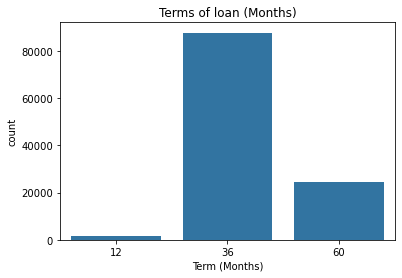

In [138]:
# Loan by term
sns.countplot(data=data,x= 'Term',color= sns.color_palette()[0]);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

- There are three types of terms -> 1,3,5 years
- Most of the terms was of 3 years, Some of them were of 5 years .
- Loans of 1 year was negligible.

## Borrower Annual Percentage Rate(APR)

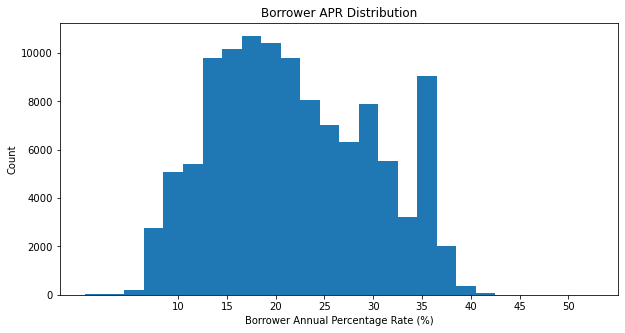

In [139]:
# Borrower APR Distribution
binsize = 2
borroweAPRPct = data['BorrowerAPR']*100
bins = np.arange(0.5, data['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borroweAPRPct, bins = bins)
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([10, 15, 20, 25, 30, 35, 40, 45,50], ['10', '15', '20', '25', '30', '35', '40', '45','50'])
plt.title('Borrower APR Distribution')
plt.show();

**Most of the APR is between 0.14-0.24 . There is an abnormal spike at rate = 0.36.**

#### Average APR for each term

In [140]:
term = term_info[0]
avg = []
for x in term:
    temp =  data['BorrowerAPR'][data['Term']==x]
    avg.append(temp.mean())

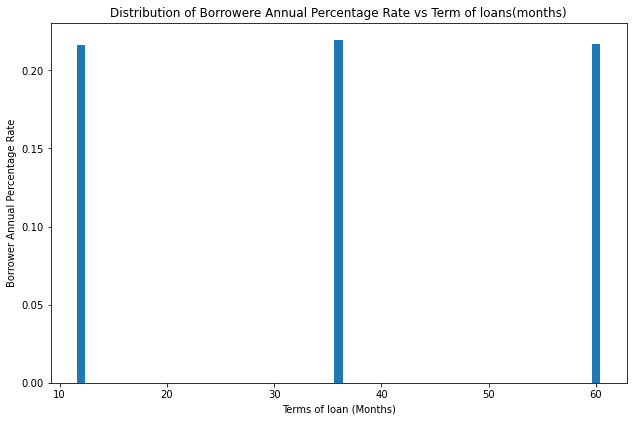

In [141]:
fig = plt.figure(figsize=[8, 5])
ax = fig.add_axes([0,0,1,1])
term = list(term_info[0])
ax.bar(term,avg)
plt.xlabel('Terms of loan (Months)')
plt.ylabel('Borrower Annual Percentage Rate')
plt.title('Distribution of Borrowere Annual Percentage Rate vs Term of loans(months)')
plt.show();

Average APR for 3 years is slightly higher than other two.
Combining above two results we can conclude that the spike was probably due to loans corresponding to 3years category as it have an average slightly greater than other two. 

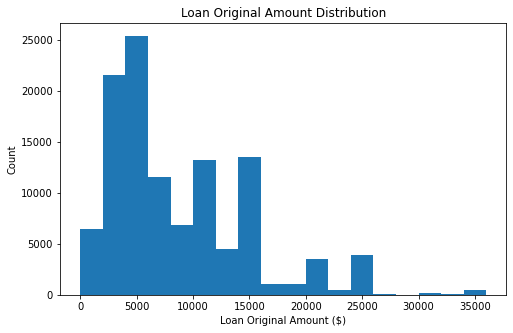

In [142]:
# Loan Original Amount Distribution
binsize = 2000
bins = np.arange(0, data['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')
plt.title('Loan Original Amount Distribution')
plt.show();

**Maximum No. of loans were around 2000-6000$**

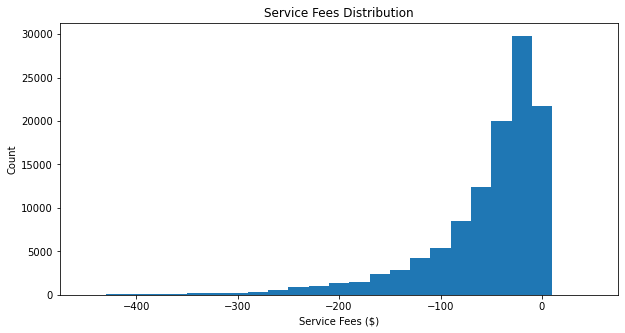

In [143]:
# Service Fees Distribution
binsize = 20
bins = np.arange(-450, data['LP_ServiceFees'].max()+binsize, binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = data, x = 'LP_ServiceFees', bins = bins)
plt.xlabel('Service Fees ($)')
plt.ylabel('Count')
plt.title('Service Fees Distribution')
plt.show();

**Count of Absolute Service Fees decreases exponentially.Most of Service fees is around -50 to -40.**

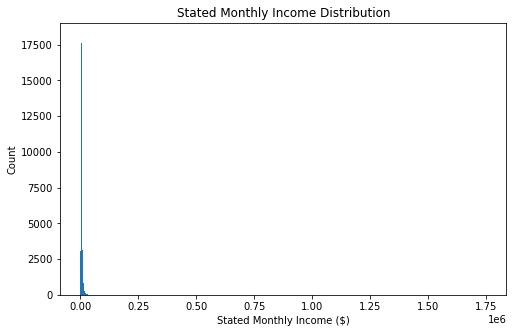

In [144]:
# Stated Monthly income distribution
binsize = 1000
bins = np.arange(0, data['StatedMonthlyIncome'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'StatedMonthlyIncome', bins = bins)
plt.ylabel('Count')
plt.xlabel('Stated Monthly Income ($)')
plt.title('Stated Monthly Income Distribution')
plt.show();

**As we can see there are some outliers in the data and data is distributed on a very large scale so lets plot it at log scale.**

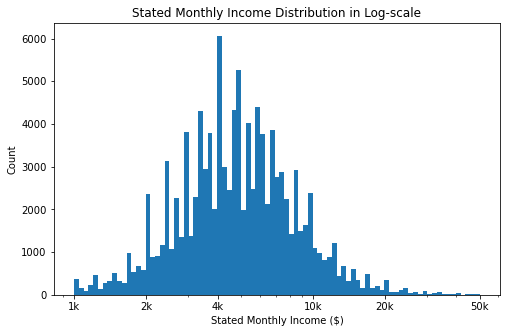

In [145]:
# Using log-scale
#In addition, truncate the X axis to show only values less than 50k which are the majority of data
log_binsize = 0.02
bins = 10 ** np.arange(3, 4.7, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 4e3, 1e4, 2e4, 5e4], ['1k', '2k','4k', '10k', '20k', '50k'])
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Count')
plt.title('Stated Monthly Income Distribution in Log-scale')
plt.show();

**Income Distribution is comparable to Guassian Distribution peaked at around 4k-5k.**

## Loan Origination Year

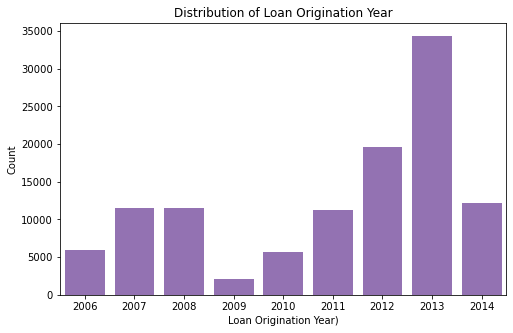

In [146]:
# Distribution of Loan Origination Year
plt.figure(figsize=[8, 5])
sns.countplot(data=data,x='year',color=sns.color_palette()[4]);
plt.xlabel('Loan Origination Year)')
plt.ylabel('Count')
plt.title('Distribution of Loan Origination Year')
plt.show();

#### Loan Status

In [147]:
count = data['LoanStatus'].value_counts()
order = count.index
# Count of Loan by Loan Status
n =data.shape[0]
max_type_count = count[0]
max_prop = max_type_count/n
tick_props = np.arange(0,max_prop,0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

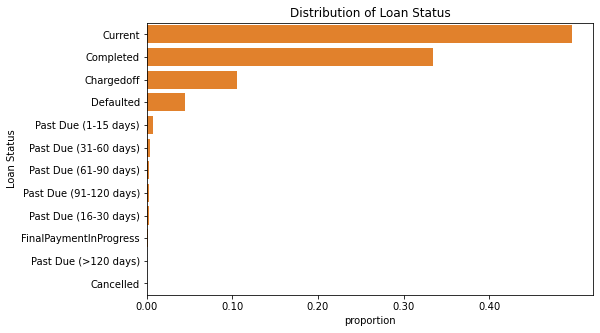

In [148]:
plt.figure(figsize=[8, 5])
sns.countplot(data=data,y='LoanStatus',color=sns.color_palette()[1],order=order);
plt.xticks(tick_props*n,tick_names)
plt.xlabel('proportion')
plt.ylabel('Loan Status')
plt.title('Distribution of Loan Status');

### Prosper Rating (numeric)

In [149]:
print(data['ProsperRating (numeric)'].value_counts())

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64


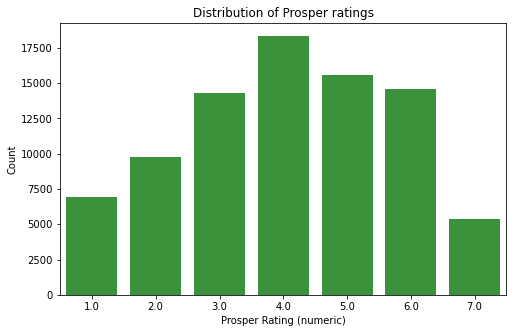

In [150]:
# Distribution of Prosper rating
plt.figure(figsize=[8, 5])
sns.countplot(data=data,x='ProsperRating (numeric)',color=sns.color_palette()[2])
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Count')
plt.title('Distribution of Prosper ratings');

**More than 50% of borrowers got Prosper Rating greater than average which corresponds to '4' which implies risk smaller than 50%.**

### Prosper Score

In [151]:
data.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

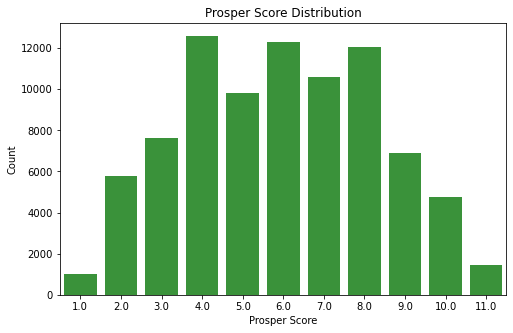

In [152]:
#Prosper Score Distribution
plt.figure(figsize=[8, 5])
sns.countplot(data=data,x= 'ProsperScore',color=sns.color_palette()[2])
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title('Prosper Score Distribution');

**Prosper Score also confirms that average risk is less than 50% as counts of Prosper score is greater than 5 is more than 50%.**

## Conclusion for univariate eploration

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There were some rows(25) in which the Browser APR was missing so I dropped the corresponding rows as they were very few compared to our data. I also extarcted the year of of Loan Origination from the LoanOriginatingYear column to perform analysis on it.

The graph of Stated monthly Income was skewed so I plotted it on a log scale which give me the insight that it was forming the normal(Guassian) Distribution.

**Observations**
- I found that more than 75% Term of Loan corresponds to 3 year and 20% belongs to 5 year Term .
- Most of the APR is between 0.14-0.24 . There is an abnormal spike at rate = 0.36.
- Maximum count of Loan's Original Amount belongs to the range 2000-6000$.
- Count of Absolute Service Fees decreases exponentially.Most of Service fees is around -50 to -40.
- Income Distribution is comparable to Guassian Distribution peaked at around 4k-5k.
- More than 50% of borrowers got Prosper Rating greater than average which corresponds to '4' which implies risk smaller than 50%.
- There is a sudden decrease in count of loans Originating from year 2008 to 2009. After that count of Loans keeps on increasing .
- Prosper Score also confirms that average risk is less than 50% as counts of Prosper score is greater than 5 is more than 50%.

# Bivariate Exploration

### Let's see the relation between the Monthly Income and APR

In [153]:
data['StatedMonthlyIncome'].mean()

5606.972787474849

In [154]:
#Data after removing some outliers
SMI = data['StatedMonthlyIncome'][data['StatedMonthlyIncome']<260000]
APR = data['BorrowerAPR'][data['StatedMonthlyIncome']<260000]*100

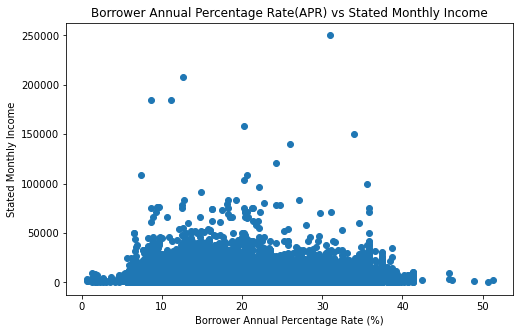

In [155]:
plt.figure(figsize=[8, 5])
plt.scatter(APR,SMI)
plt.title('Borrower Annual Percentage Rate(APR) vs Stated Monthly Income')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Stated Monthly Income')
plt.show();

- We can see that people with income more than 50,000 have APR>0.07 and APR<0.38
- Also most of people as Stated Monthly Income < 50000

In [156]:
SMI_lt_50k = data['StatedMonthlyIncome'][data['StatedMonthlyIncome']<50000]
APR_lt_50k = data['BorrowerAPR'][data['StatedMonthlyIncome']<50000]*100

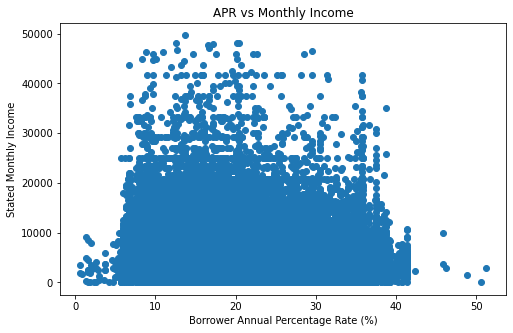

In [157]:
plt.figure(figsize=[8, 5])
plt.scatter(APR_lt_50k,SMI_lt_50k)
plt.title('APR vs Monthly Income')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Stated Monthly Income')
plt.show();

# Let's see the relation between the APR and DebtToIncomeRatio

In [158]:
#Data after removing some outliers
APR = data['BorrowerAPR']
DTIR = data['DebtToIncomeRatio']

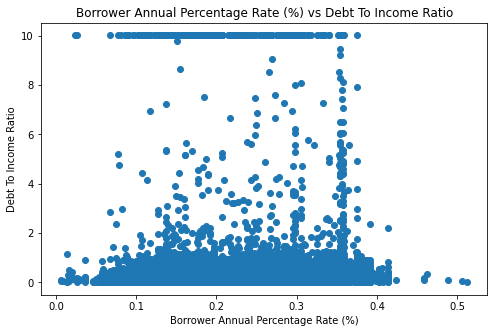

In [159]:
plt.figure(figsize=[8, 5])
plt.scatter(APR,DTIR)
plt.title('Borrower Annual Percentage Rate (%) vs Debt To Income Ratio')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Debt To Income Ratio')
plt.show();

**People with higher DebtToIncomeRatio tend to have an average APR**

In [160]:
numeric_vars =['Term', 'BorrowerAPR', 'ProsperScore',  'DebtToIncomeRatio',
               'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment',
               'LP_ServiceFees']

In [161]:
corel = ['pearson','kendall','spearman']

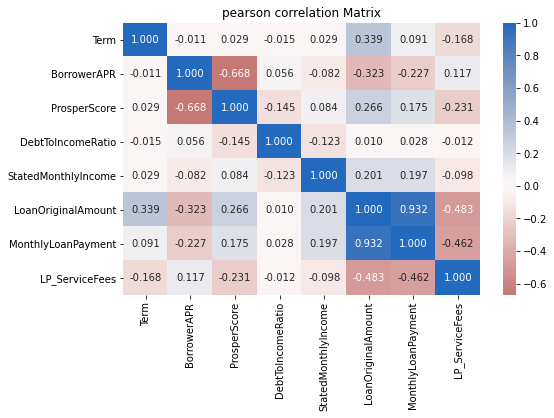

In [162]:
# Correlation matrix for all numeric variables
r = corel[0]
plt.figure(figsize=[8, 5])
corr= data[numeric_vars].corr(method=r)
sns.heatmap(corr, annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);
plt.title(r+' correlation Matrix') ;
plt.margins(x = 0.5, y= 0.3);
plt.show();

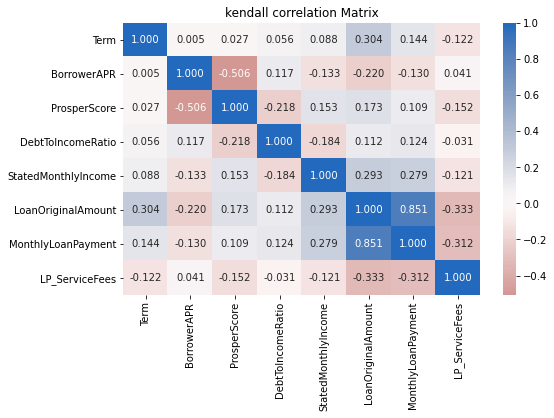

In [163]:
r = corel[1]
plt.figure(figsize=[8, 5])
corr= data[numeric_vars].corr(method=r)
sns.heatmap(corr, annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);
plt.title(r+' correlation Matrix') ;
plt.margins(x = 0.5, y= 0.3);
plt.show();

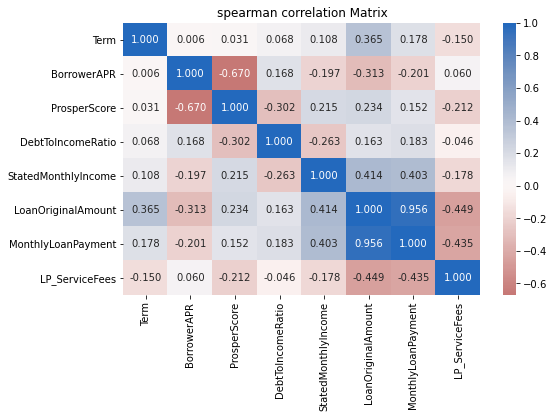

In [164]:
r = corel[2]
plt.figure(figsize=[8, 5])
corr= data[numeric_vars].corr(method=r)
sns.heatmap(corr, annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);
plt.title(r+' correlation Matrix') ;
plt.margins(x = 0.5, y= 0.3);
plt.show();

I found some very interesting results in these correlations plots.
- Negative correlation between Prosper Score and Borrower APR.
- Negative correlation between Service Fees and Monthly Loan Payment.
- Negative correlation between Service Fees and Loan Original Ammount.
- Positive spearman correlation between Stated Monthly Income and Loan Original Ammount.
- Positive spearman correlation between Stated Monthly Income and Monthly Loan Payment.
- Positive spearman correlation between Monthly Loan Payment and Loan Original Ammount which is quite obvious.

In [165]:
# Taking a sample of 500 loans 
n_samples = 500
samples = np.random.choice(data.shape[0], n_samples, replace = False)
loans_samp = data.loc[samples,:]

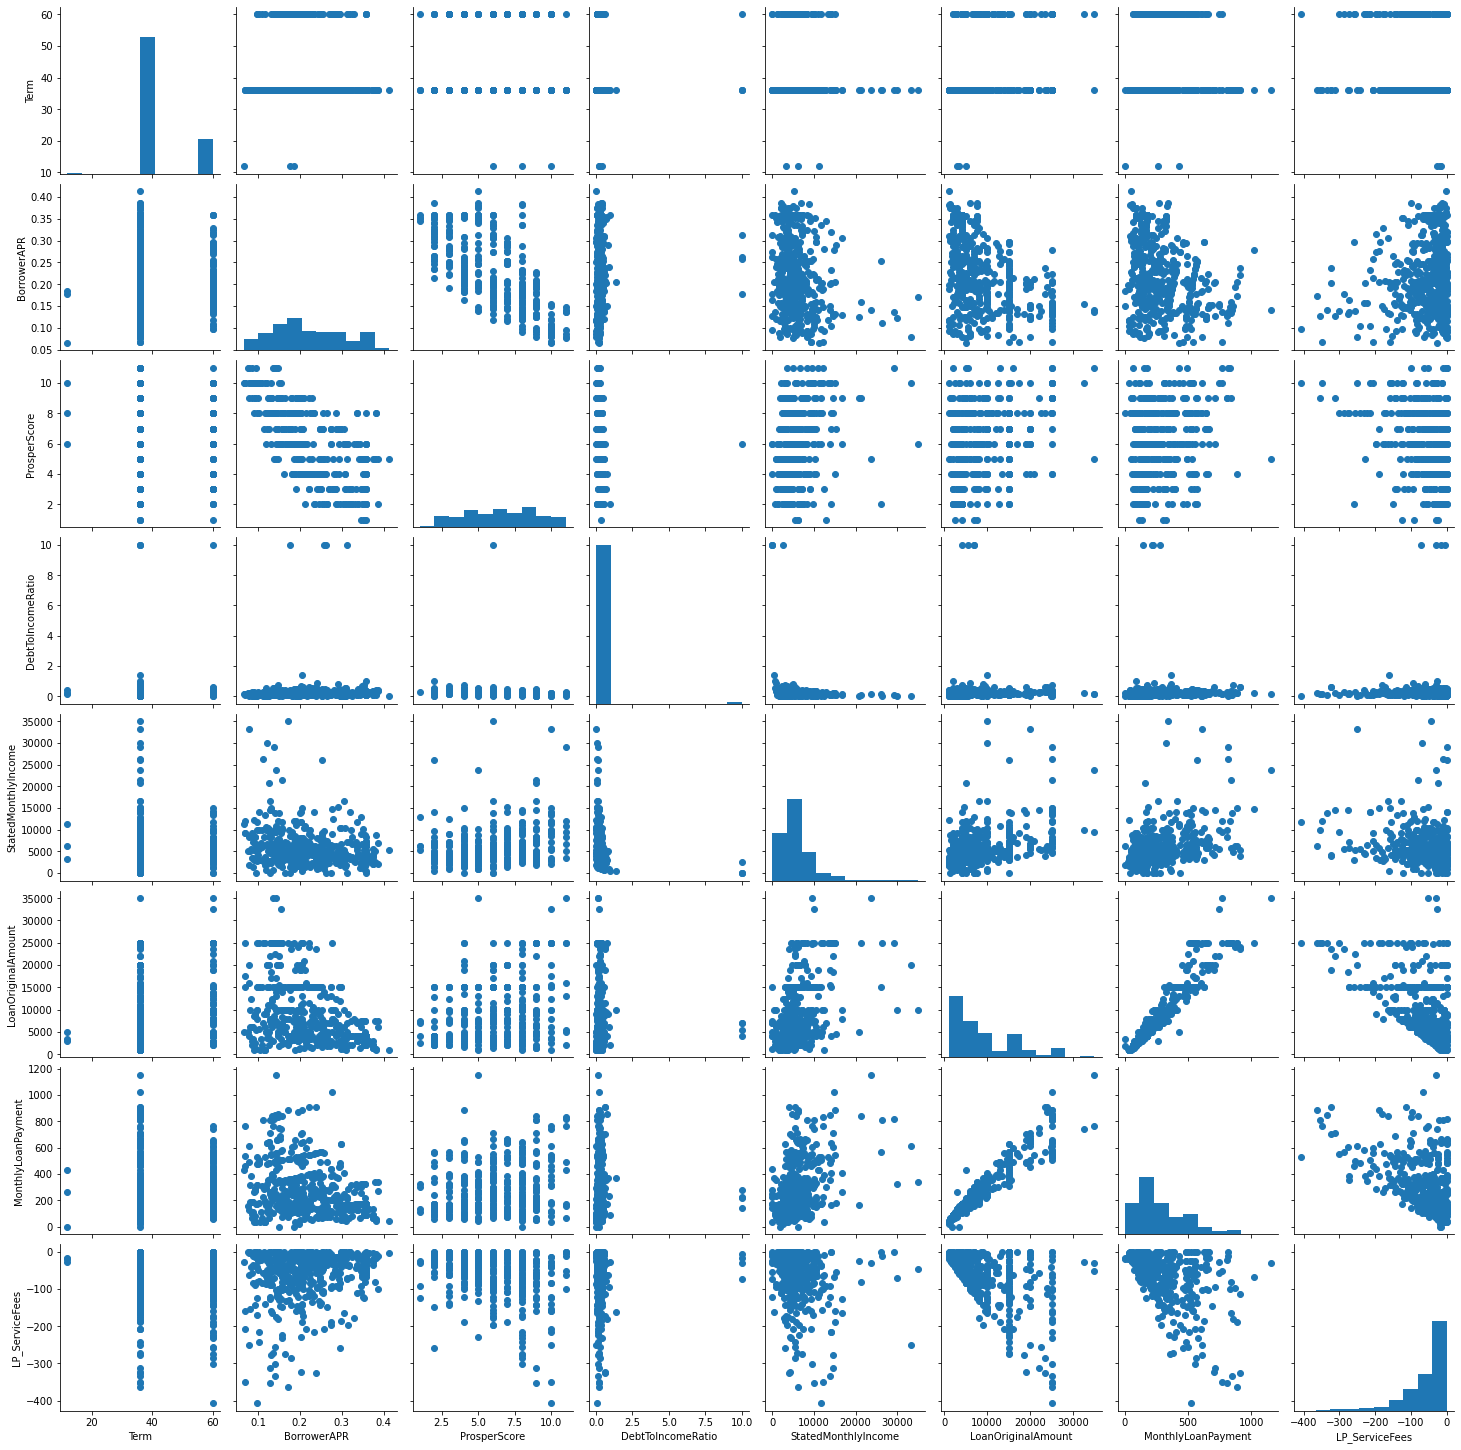

In [166]:
# Building a grid of scatter plots
g = sns.PairGrid(data = loans_samp, vars = numeric_vars)
g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist, bins = 10);

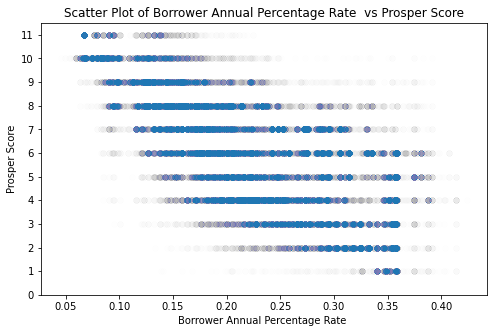

In [167]:
# Checking the relation between ProsperScore and BorrowerAPR
plt.figure(figsize = [8, 5]) 
plt.scatter(data = data, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of Borrower Annual Percentage Rate  vs Prosper Score')
plt.xlabel('Borrower Annual Percentage Rate ')
plt.ylabel('Prosper Score');

**There is clearly a negative correlation between Borrower's APR and Prosper Score as suggested by correlation heat maps.**

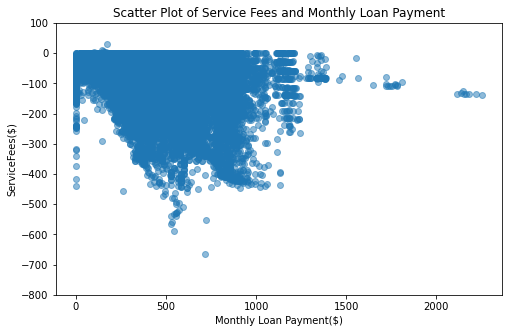

In [168]:
# Checking the relation between MonthlyLoanPayment and LP_ServiceFees
plt.figure(figsize = [8, 5]) 
plt.scatter(data = data,x = 'MonthlyLoanPayment', y = 'LP_ServiceFees',  alpha =  0.5)
plt.yticks(np.arange(-800, 200, 100))
plt.title('Scatter Plot of Service Fees and Monthly Loan Payment')
plt.xlabel('Monthly Loan Payment($)')
plt.ylabel('ServiceFees($)');

**There is a very small negative correlation between Service Fees and Monthly Loan Payment**

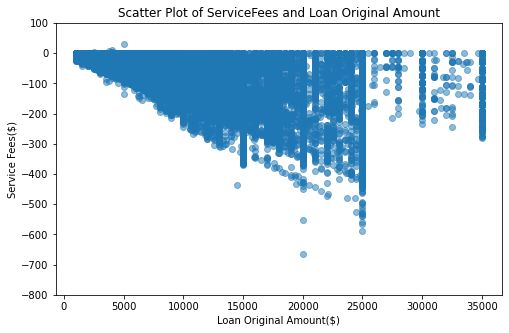

In [169]:
# Checking the relation between LoanOriginalAmount and LP_ServiceFees
plt.figure(figsize = [8, 5]) 
plt.scatter(data = data,x = 'LoanOriginalAmount', y = 'LP_ServiceFees',  alpha =  0.5)
plt.yticks(np.arange(-800, 200, 100))
plt.title('Scatter Plot of ServiceFees and Loan Original Amount')
plt.xlabel('Loan Original Amount($)')
plt.ylabel('Service Fees($)');

**There is a small negative correlation between Service Fees and Loan Oroginal Payment as suggested by heatmaps**

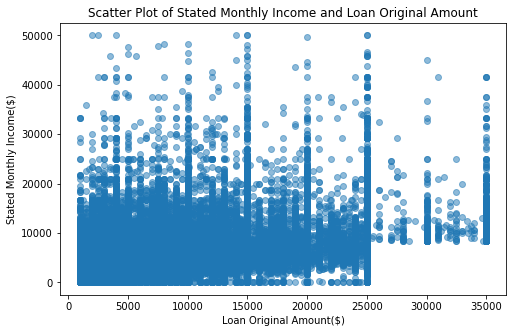

In [170]:
# Checking the relation between StatedMonthlyIncome and LoanOriginalAmount after removing some outliers
plt.figure(figsize = [8, 5]) 
x = data['LoanOriginalAmount'][data['StatedMonthlyIncome']<=50000]
y = data['StatedMonthlyIncome'][data['StatedMonthlyIncome']<=50000]
plt.scatter(x = x, y =y,  alpha =  0.5)
# plt.yticks(np.arange(-800, 200, 100))
plt.title('Scatter Plot of Stated Monthly Income and Loan Original Amount')
plt.xlabel('Loan Original Amount($)')
plt.ylabel('Stated Monthly Income($)');

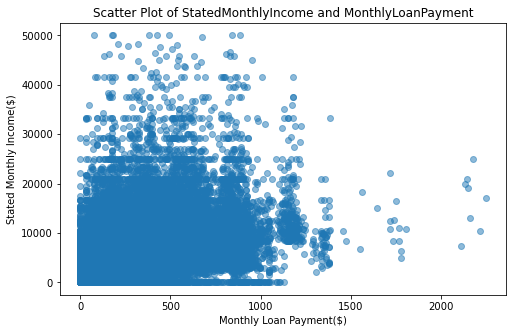

In [171]:
# Checking the relation between StatedMonthlyIncome and MonthlyLoanPayment
plt.figure(figsize = [8, 5]) 
x = data['MonthlyLoanPayment'][data['StatedMonthlyIncome']<=50000]
y = data['StatedMonthlyIncome'][data['StatedMonthlyIncome']<=50000]
plt.scatter(x = x, y =y,  alpha =  0.5)
plt.title('Scatter Plot of StatedMonthlyIncome and MonthlyLoanPayment')
plt.xlabel('Monthly Loan Payment($)')
plt.ylabel('Stated Monthly Income($)');

**There is a very small positive relation between LoanOriginalAmount and StatedMonthlyIncome**

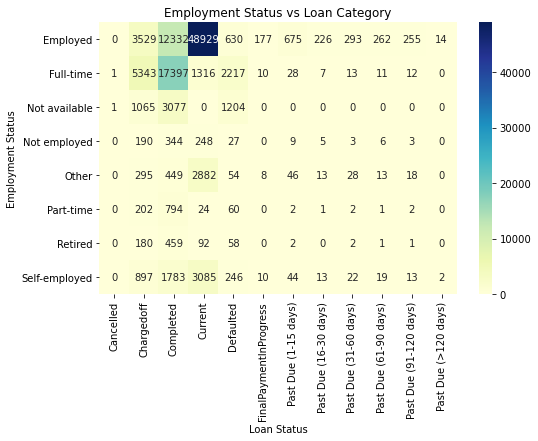

In [172]:
cat_counts = data.groupby(['EmploymentStatus', 'LoanStatus']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts = cat_counts.pivot(index = 'EmploymentStatus', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)
plt.figure(figsize = [8, 5])
sns.heatmap(cat_counts, cmap = 'YlGnBu', annot = True, fmt = ".0f")
plt.xlabel('Loan Status')
plt.ylabel('Employment Status')
plt.title('Employment Status vs Loan Category');

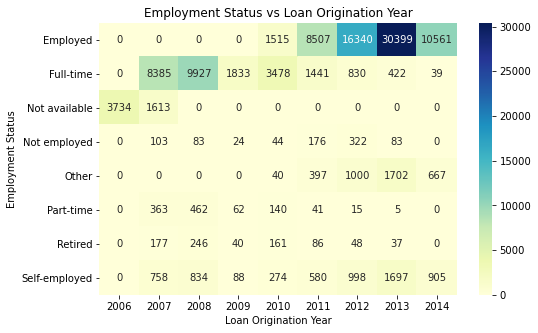

In [173]:
cat_counts = data.groupby(['EmploymentStatus', 'year']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts = cat_counts.pivot(index = 'EmploymentStatus', columns = 'year', values = 'count')
cat_counts.fillna(0, inplace=True)
plt.figure(figsize = [8, 5])
sns.heatmap(cat_counts, cmap = 'YlGnBu', annot = True, fmt = ".0f")
plt.xlabel('Loan Origination Year')
plt.ylabel('Employment Status')
plt.title('Employment Status vs Loan Origination Year');

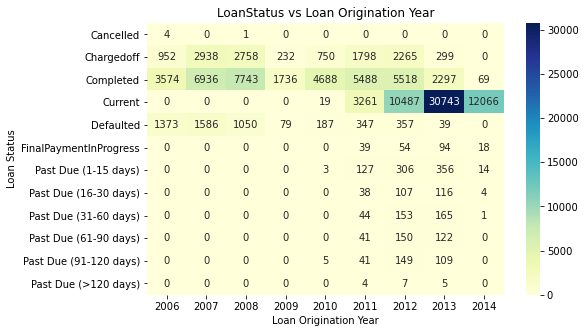

In [174]:
cat_counts = data.groupby(['LoanStatus', 'year']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts = cat_counts.pivot(index = 'LoanStatus', columns = 'year', values = 'count')
cat_counts.fillna(0, inplace=True)
plt.figure(figsize = [8, 5])
sns.heatmap(cat_counts, cmap = 'YlGnBu', annot = True, fmt = ".0f")
plt.xlabel('Loan Origination Year')
plt.ylabel('Loan Status')
plt.title('LoanStatus vs Loan Origination Year');

**Almost 60% of all the loans are in current status out of which more than 50% have Loan Origination year as 2013.**

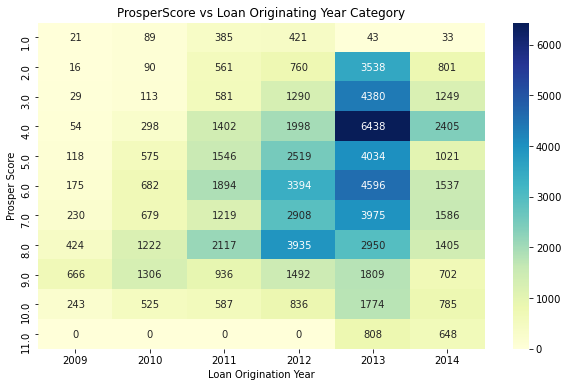

In [175]:
cat_counts = data.groupby(['ProsperScore', 'year']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts = cat_counts.pivot(index = 'ProsperScore', columns = 'year', values = 'count')
cat_counts.fillna(0, inplace=True)
plt.figure(figsize = [10, 6])
sns.heatmap(cat_counts, cmap = 'YlGnBu', annot = True, fmt = ".0f")
plt.xlabel('Loan Origination Year')
plt.ylabel('Prosper Score')
plt.title('ProsperScore vs Loan Originating Year Category');

# Conclusion for Bivariate Distribution

# Discuss the relationships and features that you find in your explorations.

- There is a negative correlation between Borrower's APR and Prosper Score .
- There is a very small positive correlation between LoanOriginalAmount and StatedMonthlyIncome.
- There is a very small negative correlation between Service Fees and Monthly Loan Payment.
- Almost 60% of all the loans are in current status out of which more than 50% have Loan Origination year as 2013.
- There is an increse in Loan Count till 2013 and then there is a sudden decrease in 2014.

# Do you find some interesting insights from your analysis?

Yes , I found that there was a sudden decrease of Loans in 2009. It might be due to some economic factor. Similarly there is a decrease in year 2014. It might be due incomplete data of the year or some economic factor.

# Multivariate Exploration

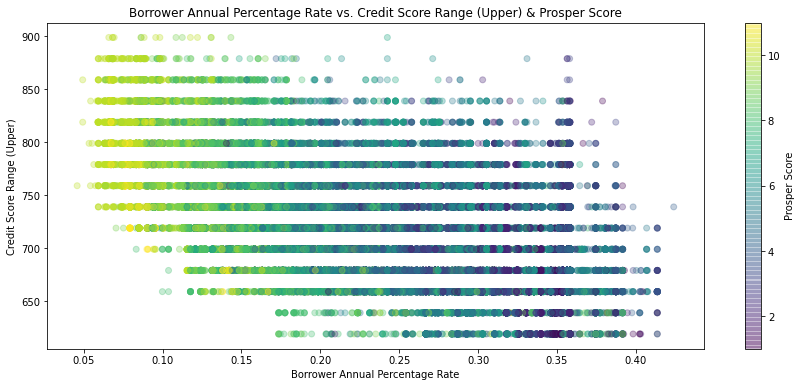

In [176]:
# BorrowerAPR vs. CreditScoreRangeUpper & prosperscore
plt.figure(figsize = [14.7, 6]) 
plt.scatter(data = data,x = 'BorrowerAPR', y = 'CreditScoreRangeUpper',  c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'Prosper Score')
plt.title('Borrower Annual Percentage Rate vs. Credit Score Range (Upper) & Prosper Score')
plt.xlabel('Borrower Annual Percentage Rate')
plt.ylabel('Credit Score Range (Upper)');

- Credit score range upper and Borrower APR are negatively correlated.
- However the Prosper Score and borrower APR are negatively correlated.
- There doesn't seems to be any relationship between Credit Score Range Upper and Prosper Score.

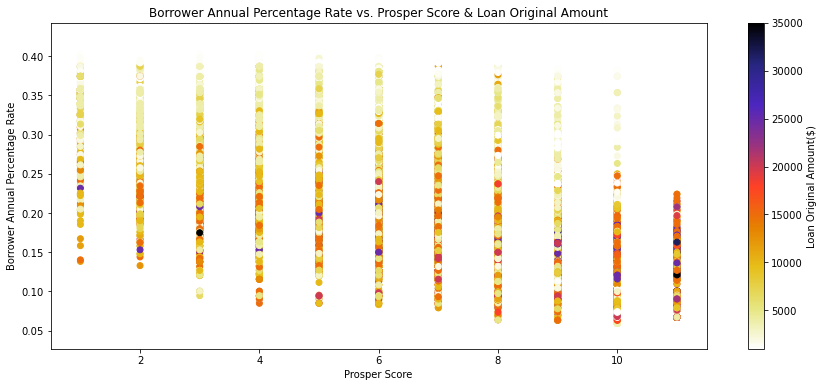

In [177]:
plt.figure(figsize = [14.7, 6]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data = data[data['StatedMonthlyIncome'] <50000], x = 'ProsperScore', y = 'BorrowerAPR', c ='LoanOriginalAmount', cmap=cm) 
plt.colorbar(label = 'Loan Original Amount($)')
plt.title('Borrower Annual Percentage Rate vs. Prosper Score & Loan Original Amount')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Annual Percentage Rate');

- There is negative co-relation between Borrower's Apr and Loan Original Ammount.
- There is positive correlation between Prosper Score and Loan Original Ammount.**

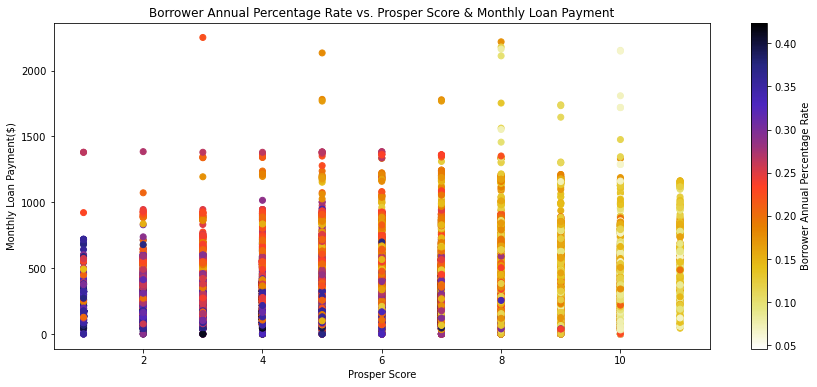

In [178]:
plt.figure(figsize = [14.7, 6])
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data = data,x = 'ProsperScore',y='MonthlyLoanPayment', c = 'BorrowerAPR',  cmap=cm) 
plt.colorbar(label = 'Borrower Annual Percentage Rate')
plt.title('Borrower Annual Percentage Rate vs. Prosper Score & Monthly Loan Payment')
plt.xlabel('Prosper Score')
plt.ylabel('Monthly Loan Payment($)');

- There is a very small negative correlation between BorrowerAPR & MonthlyLoanPayment.
- There is a negative correlation between BorrowerAPR & Prosper Score as discussed before.

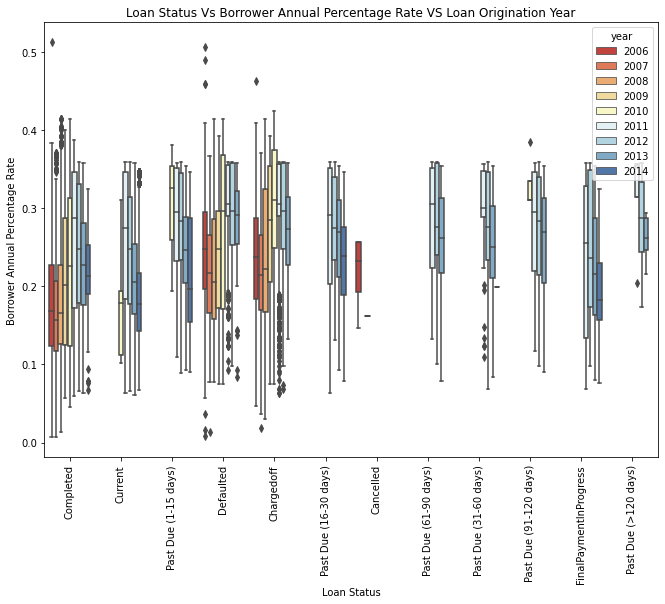

In [179]:
# LoanStatus Vs BorrowerAPR VS year
plt.figure(figsize=[11,8])
sns.boxplot(x="LoanStatus", y="BorrowerAPR", hue="year", data=data, palette="RdYlBu");
plt.xticks(rotation = 90);
plt.xlabel('Loan Status');
plt.ylabel('Borrower Annual Percentage Rate');
plt.title('Loan Status Vs Borrower Annual Percentage Rate VS Loan Origination Year');

- All the 'cancelled' Loan status were from 2006.
- Average APR increases for later years
- There are no Past Dues for years 2006-2009

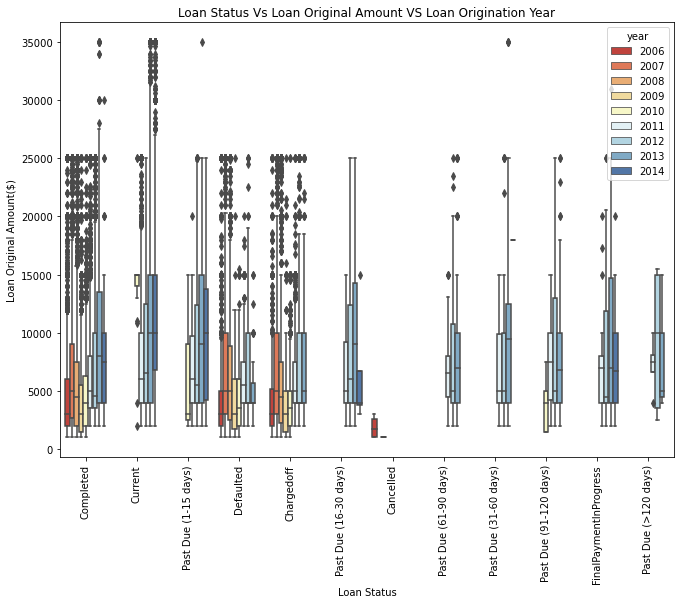

In [180]:
# LoanStatus Vs LoanOriginalAmount VS year
plt.figure(figsize=[11,8])
sns.boxplot(x="LoanStatus", y="LoanOriginalAmount", hue="year", data=data, palette="RdYlBu");
plt.xticks(rotation = 90)
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount($)')
plt.title('Loan Status Vs Loan Original Amount VS Loan Origination Year');

# What type of interesting relationships did you concluded after interaction with the data?Discuss you findinding.

**Some interesting results:-**
- All the 'cancelled' Loan status were from 2006.
- Average APR increases for later years.
- There are no Past Dues for years 2006-2009.
- There doesn't seems to be any relationship between Credit Score Range Upper and Prosper Score.This was quite unexpected beacause Credit Scores are used as an important deciding factor for granting Loans and Prosper Score is an alias for Risk Score.So there must have been some relationship between them.

# Conclusion

I found some really interesting features and relationships between variables. Some of them were quite expected such as relationship between Borrower's APR and Prosper Score .But some of them unexpected as well such as no relationship between Credit Score Range Upper and Prosper score. Most of the cancelled loans were from year 2006 which might suggest that Cancellation of loans was quite common in earlier times. Also there was a sudden decrease in Loans in year 2009 due to some economic factor.Similarly there was a sudden decrease in year 2014. There was a very small positive correlation between Loan Original Amount and Stated Monthly Income which suggests that people with higher income tends to take bigger loans which is some is somewhat self-eplanatory. I also got some insights about the Monthly Stated income of the people which normally distributed peaked around 4000,5000.